In [1]:
%load_ext autoreload
%autoreload 2

from analysis_test import *

In [5]:
# 1. Select  measurement run to analyze
MEASURE_FOLDER = os.path.join(EXP_FOLDER, 'varPAamplRunOct7')

# 2. Create dataframe from it. What different options do is documented in the source for this function
df = get_data_frame(MEASURE_FOLDER,
                    plot=True,
                    cache_all=True,
                    parallel=True)

# 3. TODO: Error in the two-body rate is sometimes NaN, so drop that column 
df.drop(columns=['betaPAErr'], inplace=True)

# 4. Drop any rows with a NaN value (mostly due to bad fits)
df.dropna(inplace=True)

# 5. Drop rows where physically inconsistent recaptrue ratios are recorded
df = df[df['ratio']<1.4]


100%|██████████| 102/102 [00:08<00:00, 12.35it/s]


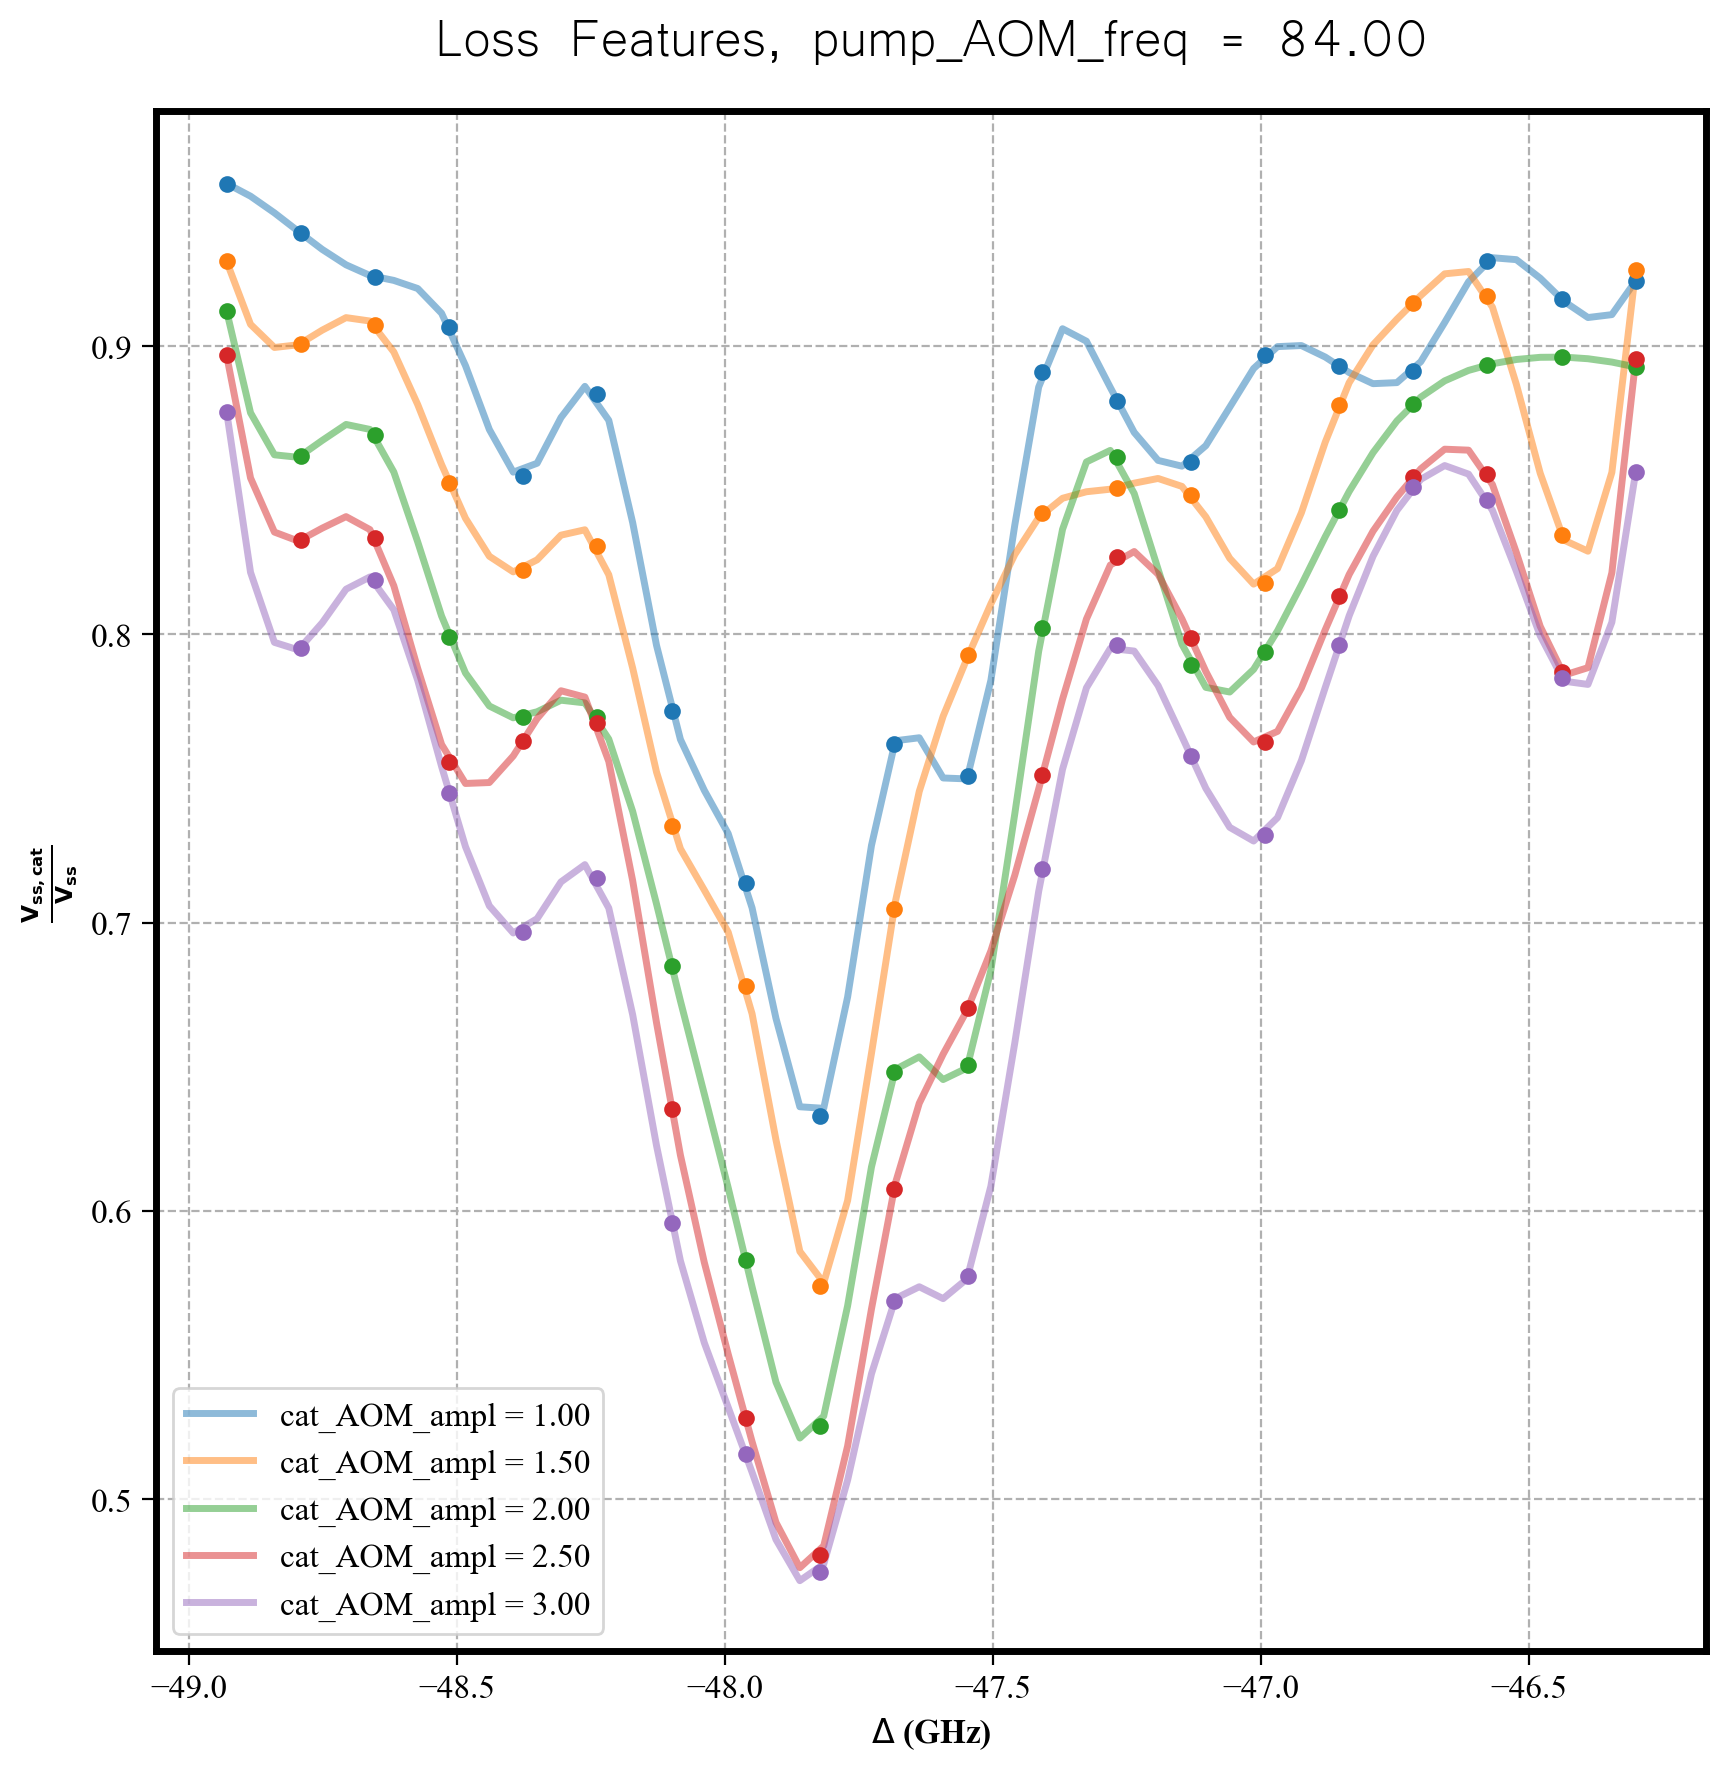

In [6]:
# the groupby key is what is used to select the trap setting that is being changed in the run
# the title key is the other (controlled) trap parameter
groupbyKey = 'cat_AOM_ampl'
titleKey = 'pump_AOM_freq'

df_grouped = df.groupby(by=groupbyKey)
min_ratios = df_grouped['ratio'].min()

groups = dict(list(df_grouped))
dfs = [df for df in groups.values()]

# plotting ratio vs freq
max_freqs = [384182.3]*len(dfs)

zipped_data = list(zip(dfs, max_freqs))
fig, ax = plt.subplots()
for i, (df, max_freq)  in enumerate(zipped_data[:]):
    data = df
    freqs = ((max_freq-PUMP_FREQUENCY)-(data['tempV']-data['tempV'].min())*FREQVSVOLT- (data['currV']-data['currV'].min())*FREQVSCURR)
    
    ax=plot_spline_fit(ax, x=freqs, y=data['ratio'], yerr=data['ratioErr'],scolor=f'C{i}', mfc=f'C{i}',color=f'C{i}', s=0.0, ms=5, figsize=(10, 10), label=f"{groupbyKey} = { data.iloc[10][groupbyKey] :.2f}", linewidth=2.5)

plt.legend()
#plt.savefig(os.path.join(MEASURE_FOLDER, 'lossFeatures.png'))
plt.title(f'Loss Features, {titleKey} = {data[titleKey].mean():.2f}', **titledict)
plt.show()
plt.close()